In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

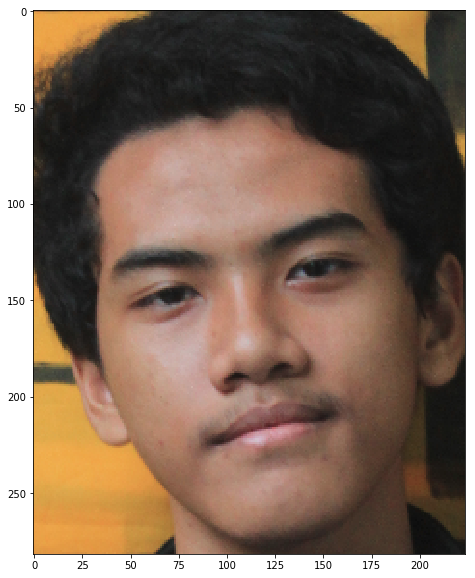

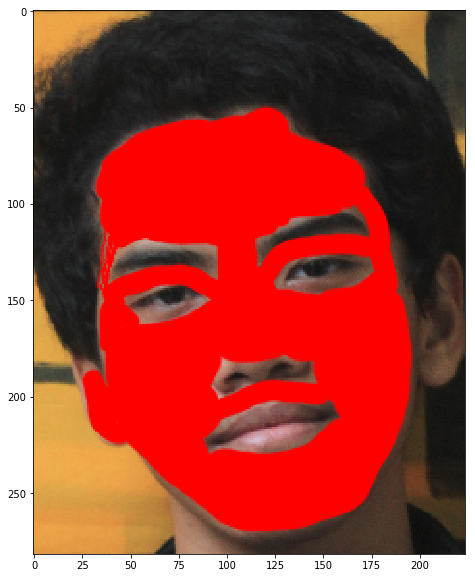

In [2]:
img = cv2.imread('jauhar.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_r = cv2.imread('jauhar2.png')
img_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(img_r)
plt.show()

dapetin warna-warna apa aja yang ada di wajah

In [3]:
color_ranges = []
height, width, _ = img.shape
for y in range(height):
    for x in range(width):
        if img_r[y][x][0] > 240 and img_r[y][x][1] < 10 and img_r[y][x][2] < 10:
            color_ranges += [img[y][x]]
color_ranges = np.array(color_ranges)

ambil 4 warna yang paling mewakili wajah

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(color_ranges)
color_representation = kmeans.cluster_centers_.astype(np.int)

tiap pixel, cari jarak terpendek ke salah satu warna yang mewakili wajah

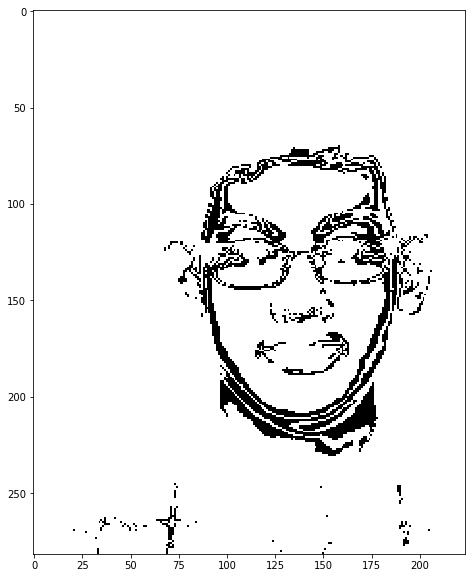

In [5]:
img = cv2.imread('test6.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 282))

height, width, _ = img.shape

img_t = np.zeros((img.shape[0], img.shape[1]))
for y in range(height):
    for x in range(width):
        diff = np.repeat(
            np.array([img[y][x]]),
            len(color_representation),
            axis=0
        ) - color_representation
        diff = np.min(np.linalg.norm(diff, axis=1)) / 390.0
        img_t[y][x] = int(diff * 255.0)
# kasih threshold
img_t = np.heaviside(img_t.astype(float) - 10, 0)

plt.figure(figsize=(10,10))
plt.imshow(img_t, cmap='gray')
plt.show()

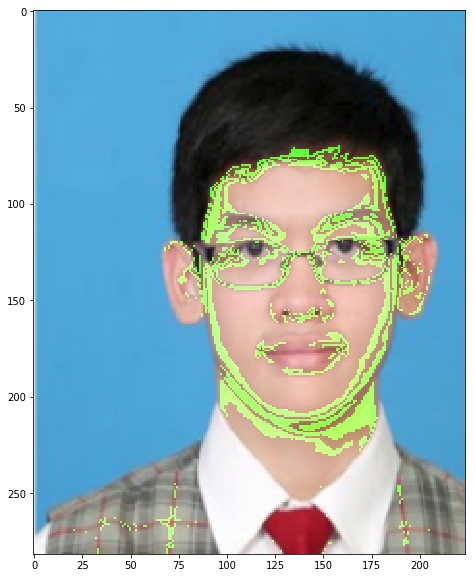

In [6]:
img_g = img.copy()
for y in range(height):
    for x in range(width):
        if img_t[y][x] < 1:
            img_g[y][x][1] = 255
            
plt.figure(figsize=(10,10))
plt.imshow(img_g)
plt.show()

hitung jumlah titik hitam di tiap kolom dan baris, cari kolom & baris mana aja yang banyak titik hitamnya

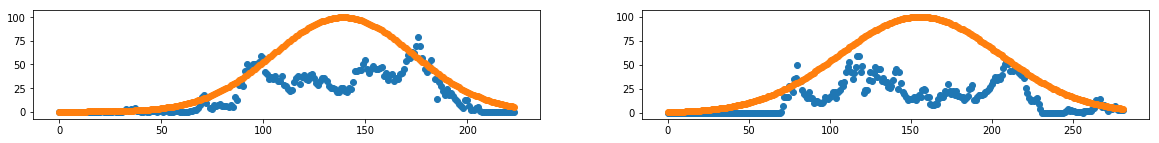

In [7]:
sum_per_col = np.sum(1 - img_t, axis=0).astype(np.int)
sum_per_row = np.sum(1 - img_t, axis=1).astype(np.int)

col = np.repeat(np.arange(len(sum_per_col)), sum_per_col)
row = np.repeat(np.arange(len(sum_per_row)), sum_per_row)

col_mean, col_var = np.mean(col), np.sqrt(np.var(col))
row_mean, row_var = np.mean(row), np.sqrt(np.var(row))

dense_col = np.heaviside(sum_per_col - col_mean + col_var, 0)
dense_row = np.heaviside(sum_per_row - row_mean + row_var, 0)

_, (plt1, plt2) = plt.subplots(1, 2, figsize=(20, 2))
plt1.scatter(np.arange(len(sum_per_col)), sum_per_col)
plt2.scatter(np.arange(len(sum_per_row)), sum_per_row)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
plt1.scatter(np.arange(len(sum_per_col)), gaussian(np.arange(len(sum_per_col)), col_mean, col_var) * 100)
plt2.scatter(np.arange(len(sum_per_row)), gaussian(np.arange(len(sum_per_row)), row_mean, row_var) * 100)

plt.show()

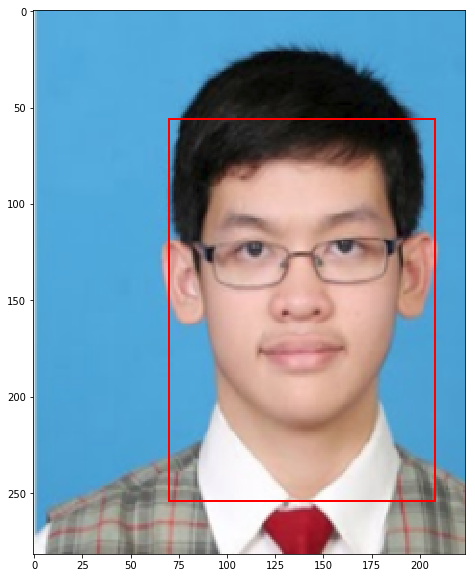

In [8]:
upper_bound = (int(col_mean - 2 * col_var), int(row_mean - 2 * row_var))
lower_bound = (int(col_mean + 2 * col_var), int(row_mean + 2 *row_var))

img_c = img.copy()
cv2.rectangle(img_c, upper_bound, lower_bound, (255,0,0))

plt.figure(figsize=(10,10))
plt.imshow(img_c)
plt.show()